<a href="https://colab.research.google.com/github/jmbanda/CSC4850-Machine-Learning/blob/main/ML_example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines - Example code - part 2

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [6]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

a = np.array([1,1])
X_new = np.vstack((X, a))
Y_new = [-1] * 20 + [1] * 20 + [-1]

a = np.array([2,2])
X_new2 = np.vstack((X, a))
Y_new2 = [-1] * 20 + [1] * 20 + [-1]

In the linearly separable case, Support Vector Machine is trying to find the line that maximizes the margin (think of a street), which is the distance between those closest dots to the line. SVM stretches this ‘street’ to the max and the decision boundary lays right in the middle, with the condition that both classes are classified correctly, in other words, the dataset is linearly separable, but in real life, we rarely find the dataset which is linearly separable.

For example, in scatter plot shown on the left below, if I add one red dot in the green cluster, the dataset becomes non-linearly separable anymore. Two solutions to this problem:

1) We still can try to find a line to separate red and green dots, but we tolerate one or few misclassified dots (e.g. the dots circled in red). This is called the Soft Margin.

2) Or we can try to find a non-linear decision boundary to separate red and green dots. This is called the Kernel Trick.

Text(0.5, 1.0, 'Linearly not separable 2')

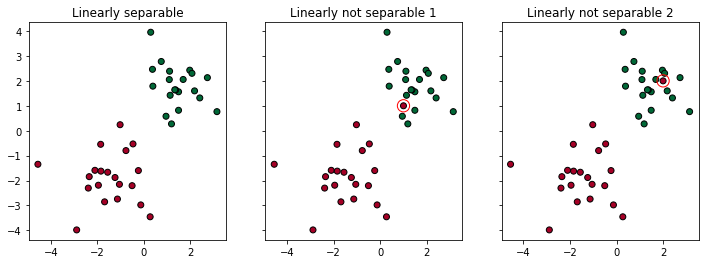

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4),sharey=True)

ax1.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax1.set_title('Linearly separable')

ax2.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax2.scatter(1, 1, s=150, facecolors='none', zorder=10, 
            edgecolors='r')

ax2.set_title('Linearly not separable 1')

ax3.scatter(X_new2[:, 0], X_new2[:, 1], c=Y_new2, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax3.scatter(2, 2, s=150, facecolors='none', zorder=10, 
            edgecolors='r')

ax3.set_title('Linearly not separable 2')

## Soft Margin

Soft Margin tolerates a few dots to get misclassified as it tries to balance the trade-off between finding a line that maximizes the margin and minimizes the misclassification. Two types of misclassifications can happen:

1) The dot is on the wrong side of the decision boundary but on the correct side/ on the margin (shown in left)

2) The dot is on the wrong side of the decision boundary and on the wrong side of the margin (shown in right)

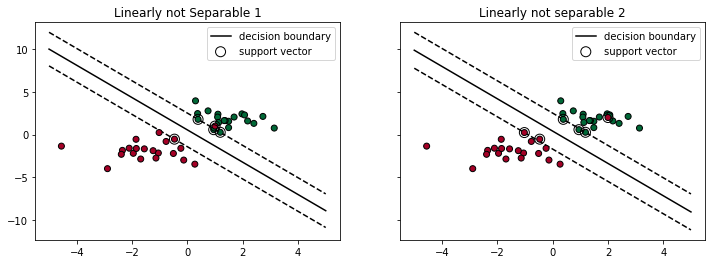

In [8]:
# Two types of misclassfication
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4),sharey=True)

# fit svm
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_new, Y_new)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot dot
ax1.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
# plot decision boundary
ax1.plot(xx, yy, 'k-', label = 'decision boundary')
# plot margin
ax1.plot(xx, yy_down, 'k--')
ax1.plot(xx, yy_up, 'k--')
# plot support vector
ax1.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k',label = 'support vector')
ax1.set_title('Linearly not Separable 1')

ax1.legend()

# fit svm
clf2 = svm.SVC(kernel='linear', C=1)
clf2.fit(X_new2, Y_new2)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf2.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot dot
ax2.scatter(X_new2[:, 0], X_new2[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
# plot decision boundary
ax2.plot(xx, yy, 'k-', label = 'decision boundary')
# plot margin
ax2.plot(xx, yy_down, 'k--')
ax2.plot(xx, yy_up, 'k--')
# plot support vector
ax2.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k',label = 'support vector')

ax2.set_title('Linearly not separable 2')

ax2.legend()

Either case, the support vector machine tolerates those dots to be misclassified when it tries to find the linear decision boundary.

## Degree of tolerance
How much tolerance we want to set when finding the decision boundary is an important hyper-parameter for the SVM (both linear and nonlinear solutions). 

In Sklearn, it is represented as the penalty term — ‘C’. The bigger the C, the more penalty SVM gets when it makes misclassification. Therefore, the narrower the margin is and fewer support vectors the decision boundary will depend on.



```
# Default Penalty/Default Tolerance
clf = svm.SVC(kernel='linear', C=1)
# Less Penalty/More Tolearance
clf2 = svm.SVC(kernel='linear', C=0.01)
```



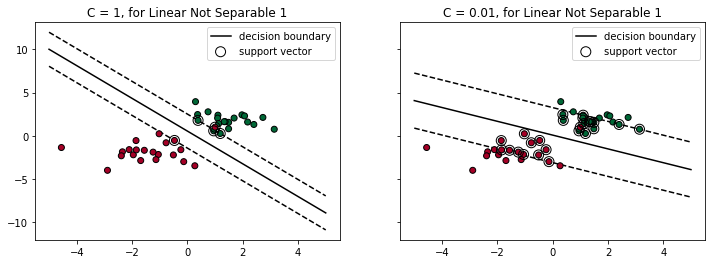

In [9]:
# Illustrate Degree of tolerance 
# penalty term - C in linear SVM
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4),sharey=True)

# fit svm
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_new, Y_new)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot dot
ax1.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
# plot decision boundary
ax1.plot(xx, yy, 'k-', label = 'decision boundary')
# plot margin
ax1.plot(xx, yy_down, 'k--')
ax1.plot(xx, yy_up, 'k--')
# plot support vector
ax1.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k',label = 'support vector')
ax1.set_title('C = 1, for Linear Not Separable 1')

ax1.legend()

# fit svm
clf2 = svm.SVC(kernel='linear', C=0.01)
clf2.fit(X_new, Y_new)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf2.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot dot
ax2.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
# plot decision boundary
ax2.plot(xx, yy, 'k-', label = 'decision boundary')
# plot margin
ax2.plot(xx, yy_down, 'k--')
ax2.plot(xx, yy_up, 'k--')
# plot support vector
ax2.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k',label = 'support vector')

ax2.set_title('C = 0.01, for Linear Not Separable 1')

ax2.legend()

# Kernel Trick

What Kernel Trick does is it utilizes existing features, applies some transformations, and create new features. Those new features are the key for SVM to find the nonlinear decision boundary.

In Sklearn — `svm.SVC()`, we can choose ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable as our kernel/transformation. I will give examples of the two most popular kernels — polynomial and Radial Basis Function(RBF).

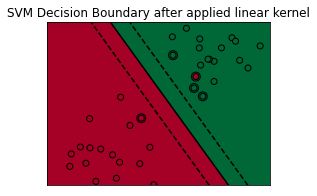

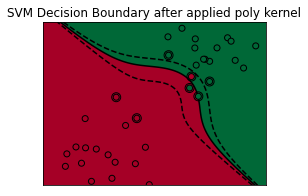

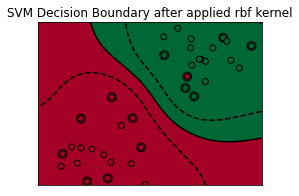

In [10]:
# Demonstrating Linear, Ploy, RBF, kernel
# figure number
fignum = 1

# fit the model
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma='auto')
    clf.fit(X_new, Y_new)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap='RdYlGn')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
#     ('f model: T=%i' %t)
    plt.title('SVM Decision Boundary after applied %s kernel' %kernel)
    fignum = fignum + 1
plt.show()

### Polynomial Kernel

Think of the polynomial kernel as a transformer/processor to generate new features by applying the polynomial combination of all the existing features.

To illustrate the benefit of applying a polynomial transformer, let’s use a simple example:

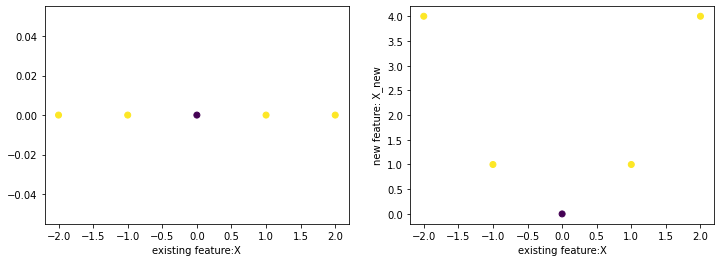

In [7]:
# Illustrate polynominal
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

X = np.array([-2,-1,0, 1,2])
Y = np.array([1,1,0,1,1])
ax1.scatter(X, np.zeros_like(X), c=Y)
ax1.set_xlabel('existing feature:X')

X2 = np.power(np.array([-2,-1,0, 1,2]),2)
ax2.scatter(X,X2,c=Y)
ax2.set_xlabel('existing feature:X')
ax2.set_ylabel('new feature: X_new')
plt.show()

Existing Feature: `X = np.array([-2,-1,0, 1,2])`
Label: `Y = np.array([1,1,0,1,1])`
it’s impossible for us to find a line to separate the yellow (1)and purple (0) dots (shown below on the left).

But, if we apply transformation X² to get:
New Feature: `X = np.array([4,1,0, 1,4])`
By combing the existing and new feature, we can certainly draw a line to separate the yellow purple dots (shown on the right).

Support vector machine with a polynomial kernel can generate a non-linear decision boundary using those polynomial features.

### Radial Basis Function (RBF) kernel

Think of the Radial Basis Function kernel as a transformer/processor to generate new features by measuring the distance between all other dots to a specific dot/dots — centers. The most popular/basic RBF kernel is the Gaussian Radial Basis Function:

$\phi (x,center) = exp{(-\gamma \left \| x - center \right \|^{2})}$

gamma (γ) controls the influence of new features — Φ(x, center) on the decision boundary. The higher the gamma, the more influence of the features will have on the decision boundary, more wiggling the boundary will be.

To illustrate the benefit of applying a Gaussian rbf (gamma = 0.1), let’s use the same example:

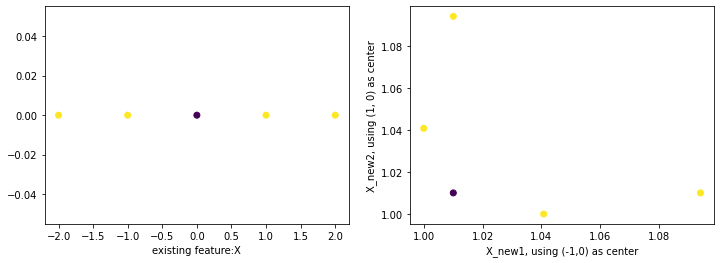

In [13]:
X_C1 = np.array([-2,-1,0, 1,2]) - (-1)
X_C1_t = np.exp(np.power(-(0.1*X_C1),2))
X_C2 = np.array([-2,-1,0, 1,2]) - (1)
X_C2_t = np.exp(np.power(-(0.1*X_C2),2))

# Illustrate rbf
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

X = np.array([-2,-1,0, 1,2])
Y = np.array([1,1,0,1,1])
ax1.scatter(X, np.zeros_like(X), c=Y)
ax1.set_xlabel('existing feature:X')


ax2.scatter(X_C1_t,X_C2_t,c=Y)
ax2.set_xlabel('X_new1, using (-1,0) as center')
ax2.set_ylabel('X_new2, using (1, 0) as center')
plt.show()

Existing Feature: `X = np.array([-2,-1,0, 1,2])`
Label: `Y = np.array([1,1,0,1,1])`
Again, it’s impossible for us to find a line to separate the yellow (1) and purple (1) dots (on left hand).

But, if we apply Gaussian RBF transformation using two centers (-1,0) and (2,0) to get new features, we will then be able to draw a line to separate the yellow purple dots (on the right):
New Feature 1: `X_new1 = array([1.01, 1.00, 1.01, 1.04, 1.09])`
New Feature 2: `X_new2 = array([1.09, 1.04, 1.01, 1.00, 1.01])`

```
# Note for how we get 1.01:
Φ(x1,center1) = np.exp(np.power(-(gamma*(x1-center1)),2)) = 1.01
# gamma = 0.1
# center1 = [-1,0]
# x1 = [-2,0]
```

Similar to the penalty term — C in the soft margin, Gamma is a hyperparameter that we can tune for when we use SVM.

```
# Gamma is small, influence is small
clf = svm.SVC(kernel='rbf', Gamma=1)
# Gamma gets bigger, influence increase, the decision boundary get wiggled
clf2 = svm.SVC(kernel='rbf', Gamma=10)
# Gamma gets too big, influence too much, the decision boundary get too wiggled
clf3 = svm.SVC(kernel='rbf', Gamma=20)
```




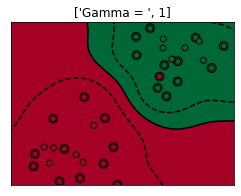

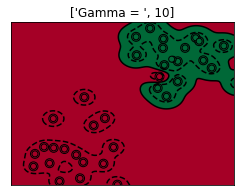

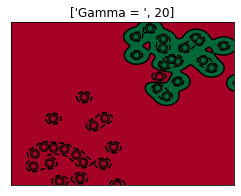

In [14]:
# Demonstrating Gamma Tunning
# figure number
fignum = 1

# fit the model
for gamma in [1,10,20]:
    clf = svm.SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_new, Y_new)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap='RdYlGn')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title(['Gamma = ', gamma])
    fignum = fignum + 1
plt.show()

# To sum up:

1) By combining the soft margin (tolerance of misclassification) and kernel trick together, Support Vector Machine is able to structure the decision boundary for linearly non-separable cases.

2) Hyper-parameters like C or Gamma control how wiggling the SVM decision boundary could be.

3) the higher the C, the more penalty SVM was given when it misclassified, and therefore the less wiggling the decision boundary will be
the higher the gamma, the more influence the feature data points will have on the decision boundary, thereby the more wiggling the boundary will be

Source used: 
https://medium.com/bite-sized-machine-learning/support-vector-machine-explained-soft-margin-kernel-tricks-3728dfb92cee